<a href="https://colab.research.google.com/github/brenocsp/intro-data-science/blob/main/lists/a4-comparando-classificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista Aberta do Módulo 4 - Comparando Classificadores

**Regras para envio:**

1. Faça uma cópia deste arquivo
2. Deixe o arquivo aberto para qualquer pessoa com o link (Share > Anyone with the link)
3. Garanta que as saídas do notebook estão salvas (Settings > deixe desligada a opção (New notebooks use private outputs (omit outputs when saving)), e acesse o link depois em outro navegador para garantir que estão!)
4. Breno Claudio de Sena Pimenta
5. Após finalizar o exercício, poste o link (apenas o link!) no moodle. 

**Atenção**: como temos pouco tempo para o fechamento do semestre, por favor garantam que seus links estão corretos! Não teremos tempo para correções. É essencial que os alunos de ICD saibam usar o Google Colab.

## Identificação de malignidade em tumores de mama - UCI ML Breast Cancer Wisconsin (Diagnostic)

Neste trabalho você deverá realizar uma comparação entre o k-Nearest Neighbors (KNN) e o Random Forest para classificação de pacientes com tumores na mama (maligno = 1 vs benigno = 0). Para isso, usaremos o dataset de câncer de mama de UCI (já embutido no sklearn).

A avaliação dos métodos deverá ser feito usando precisão, revocação e F1. Você também deve reportar a matriz de confusão.

Você não precisa implementar os métodos, já que estão disponíveis na biblioteca scikit-learn da linguagem Python. Se necessário, pode fazer mais importações de bibliotecas.

## Importando módulos e baixando dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt

In [ ]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns =[cancer.feature_names])

In [ ]:
df.shape

(569, 30)

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
#Para acessar as labels
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
#Pegar as colunas que serão usadas na classificação
features = df.columns

# Número de folds da validação cruzada
SPLITS = 5

Se tiver dúvidas sobre a validação cruzada, recomendo :https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e . Para regressão, vocês usaram o kfold, agora recomendo a utilização do StratifiedKFold.

# Exercício 01: 

Use o RandomForest para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:
* Varie a o número de árvores (n_estimators) e a profundidade máxima da árvore (n_estimators). Faça pelo menos 4 configurações.
* Realize validação cruzada, com k-fold igual a 5
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


In [ ]:
X = df[features].values
Y = cancer.target
rfcMetrics = []

for estimator in [5, 25, 45, 65]:
  
  for depth in [2, 10, 18, 26]:
    kfold = StratifiedKFold(n_splits=SPLITS, random_state=1, shuffle=True)
    clf = RandomForestClassifier(n_estimators=estimator, max_depth=depth, random_state=7)

    for train, test in kfold.split(X, Y):
      x_train, x_test = X[train], X[test]
      y_train, y_test = Y[train], Y[test]
      clf.fit(x_train, y_train)
      y_pred=clf.predict(x_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    confusionMatrix = metrics.confusion_matrix(y_test, y_pred)

    rfcMetrics.append([estimator, depth, accuracy, recall, f1, confusionMatrix])

rfcMetrics = pd.DataFrame(rfcMetrics, columns=['Estimador', 'Profundidade', 'Precisão', 'Revocação', 'F1', 'Matriz de Confusão'])
rfcMetrics.sort_values(by='F1', ascending=False)

,Estimador,Profundidade,Precisão,Revocação,F1,Matriz de Confusão
5,25,10,0.955752,0.971831,0.965035,"[[39, 3], [2, 69]]"
6,25,18,0.955752,0.971831,0.965035,"[[39, 3], [2, 69]]"
7,25,26,0.955752,0.971831,0.965035,"[[39, 3], [2, 69]]"
9,45,10,0.946903,0.971831,0.958333,"[[38, 4], [2, 69]]"
10,45,18,0.946903,0.971831,0.958333,"[[38, 4], [2, 69]]"
11,45,26,0.946903,0.971831,0.958333,"[[38, 4], [2, 69]]"
13,65,10,0.946903,0.971831,0.958333,"[[38, 4], [2, 69]]"
14,65,18,0.946903,0.971831,0.958333,"[[38, 4], [2, 69]]"
15,65,26,0.946903,0.971831,0.958333,"[[38, 4], [2, 69]]"
4,25,2,0.938053,0.971831,0.951724,"[[37, 5], [2, 69]]"


# Exercício 02: 

Use a knn para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:

* Escolha e reporte resultados com 3 números de vizinhos diferentes (k)
* Realize validação cruzada, com k-fold igual a 5 (para cada um dos k vizinhos)
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


In [ ]:
X = df[features].values
Y = cancer.target
kfoldMetrics = []

for neighbors in [5, 25, 50, 75, 100]:
  knn = KNeighborsClassifier(n_neighbors = neighbors)
  kfold = StratifiedKFold(n_splits=SPLITS, random_state=1, shuffle=True)

  for train, test in kfold.split(X,Y):
    x_train, x_test = X[train], X[test]
    y_train, y_test = Y[train], Y[test]
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
  
  accuracy = metrics.accuracy_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)
  f1 = metrics.f1_score(y_test, y_pred)
  
  kfoldMetrics.append([neighbors, accuracy, recall, f1, confusionMatrix])

kfoldMetrics = pd.DataFrame(kfoldMetrics, columns=['Vizinhos', 'Precisão', 'Revocação', 'F1', 'Matriz de Confusão'])
kfoldMetrics

,Vizinhos,Precisão,Revocação,F1,Matriz de Confusão
0,5,0.946903,0.957746,0.957746,"[[38, 4], [2, 69]]"
1,25,0.920354,0.985915,0.939597,"[[38, 4], [2, 69]]"
2,50,0.920354,0.985915,0.939597,"[[38, 4], [2, 69]]"
3,75,0.902655,0.985915,0.927152,"[[38, 4], [2, 69]]"
4,100,0.902655,0.985915,0.927152,"[[38, 4], [2, 69]]"


# Exercício 03: 

Compare os resultados (F1 de cada método com cada configuração) em um gráfico. Qual foi o melhor método? Houve diferença significativa com as variações de parâmetros?

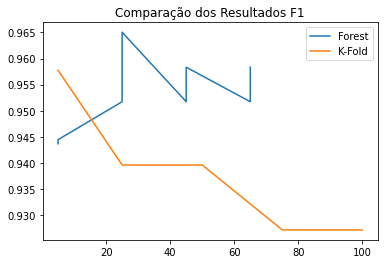

In [ ]:
forestF1 = pd.DataFrame()
forestF1[['Estimadores', 'Forest F1']] = rfcMetrics[['Estimador', 'F1']]

kfoldF1 = pd.DataFrame()
kfoldF1[['Vizinhos', 'K-Fold F1']] = kfoldMetrics[['Vizinhos', 'F1']]

fig = plt.figure()
plt.plot(forestF1['Estimadores'], forestF1['Forest F1'])
plt.plot(kfoldF1['Vizinhos'], kfoldF1['K-Fold F1'])
plt.title('Comparação dos Resultados F1')

plt.legend(['Forest', 'K-Fold']);

plt.show()

O melhor modelo é o do Random Forest. Ele gerou resultados consistentemente melhores. Enquanto o K-Fold gerou o melhor resultado para 5 vizinhos e foi caindo com o aumento de vizinhos. A diferença é significativa, com o aumento de estimadores, o Random Forest melhorou o resultado, já o K-Fold piorou.

# Exercício 04: 

Escolha a melhor configuração/método e refaça o modelo, agora usando apenas 5 features. (Você pode selecionar aleatoriamente ou usar alguma metodologia de feature selection). O que aconteceu com a F1? Por quê?

In [ ]:
def runRandomForest(df, X, Y, estimator, depth):

  kfold = StratifiedKFold(n_splits=SPLITS, random_state=1, shuffle=True)
  clf = RandomForestClassifier(n_estimators=estimator, max_depth=depth, random_state=7)

  for train, test in kfold.split(X, Y):
    x_train, x_test = X[train], X[test]
    y_train, y_test = Y[train], Y[test]
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)

  accuracy = metrics.accuracy_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)
  f1 = metrics.f1_score(y_test, y_pred)
  confusionMatrix = metrics.confusion_matrix(y_test, y_pred)

  return (df.columns.tolist(), accuracy, recall, f1, confusionMatrix)

In [ ]:
comparingResults = []

for i in list(range(1, 10)):
  n = np.random.randint(0, 30, size=5)
  lessFeatures = df.iloc[:, n]

  X = lessFeatures.values
  Y = cancer.target

  comparingResults.append(runRandomForest(lessFeatures, X, Y, estimator=25, depth=10))

comparingResults = pd.DataFrame(comparingResults, columns=['Features', 'Precisão', 'Revocação', 'F1', 'Matriz de Confusão'])
comparingResults.sort_values(by='F1', ascending=False)

,Features,Precisão,Revocação,F1,Matriz de Confusão
7,"[(concavity error,), (mean area,), (compactnes...",0.964602,0.985915,0.972222,"[[39, 3], [1, 70]]"
2,"[(worst concavity,), (mean radius,), (worst ar...",0.955752,0.985915,0.965517,"[[38, 4], [1, 70]]"
3,"[(worst concave points,), (radius error,), (me...",0.955752,0.971831,0.965035,"[[39, 3], [2, 69]]"
6,"[(concave points error,), (worst radius,), (me...",0.938053,0.971831,0.951724,"[[37, 5], [2, 69]]"
0,"[(worst area,), (smoothness error,), (mean sym...",0.929204,0.957746,0.944444,"[[37, 5], [3, 68]]"
8,"[(area error,), (concavity error,), (mean conc...",0.929204,0.943662,0.943662,"[[38, 4], [4, 67]]"
1,"[(fractal dimension error,), (mean radius,), (...",0.920354,0.943662,0.937063,"[[37, 5], [4, 67]]"
4,"[(smoothness error,), (perimeter error,), (mea...",0.920354,0.943662,0.937063,"[[37, 5], [4, 67]]"
5,"[(mean symmetry,), (worst texture,), (mean tex...",0.796460,0.845070,0.839161,"[[30, 12], [11, 60]]"


O código acima seleciona aleatoriamente 5 features dentre as presentes no dataset para prever os casos de câncer. Podemos ver que para algumas seleções o valor de F1 caiu e para outras ele aumentou ao ter como referência todas as features. Isso significa que algumas features tem mais relevância para a predição do câncer do que outras, logo devem ter mais peso para melhorar a predição geral do modelo.